<a href="https://colab.research.google.com/github/firaolkiya/solar-challenge-week1/blob/eda-benin/notebooks/benin_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

view top 10 data

In [119]:
ds =pd.read_csv("/content/benin-malanville.csv")
ds.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
5  2021-08-09 00:06 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4   
6  2021-08-09 00:07 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0   
7  2021-08-09 00:08 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3   
8  2021-08-09 00:09 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1   
9  2021-08-09 00:10 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   
5      0.1  119.1      0.0  997         0            0.0   26.4   26.3   
6      0.0    0.0      0.0  997         0            0.0   26.5   26.3   
7      0.6  126.8      2.8  997         0            0.0   26.5   26.3   
8      0.5  124.9      5.5  997         0            0.0   26.5   26.4   
9      0.5  114.2      5.1  997         0            0.0   26.5   26.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

check dimension of dataset

In [120]:
ds.shape

(525600, 19)

Summary Statistics & Missing-Value Report

In [121]:
print("Summary Statistics:")
print(ds.describe())
print("\n\n describe each columns")
print(ds.describe(include='all'))

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [114]:
print("\nMissing Value Report:")
missing_values = ds.isna().sum()
print(missing_values)

total_rows = ds.shape[0]
print("\nColumns with >5% nulls:")
for column, count in missing_values.items():
  if count / total_rows > 0.05:
    print(f"- {column}: {count} ({count / total_rows:.2%})")


Missing Value Report:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% nulls:
- Comments: 525600 (100.00%)


In [122]:
ds.dropna(inplace=True,axis=1)
ds.shape

(525600, 18)

check for an overview of dataset and missing values

In [116]:
def overview(ds):
  print("overview of dataset")
  print(ds.info())
  print("----------------------------------")
  print("total missing values in each column")
  print(ds.isna().sum())

print("data set before dropping columns")
overview(ds)


data set before dropping columns
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [117]:
print("total missing values in each column")
ds.isna()


total missing values in each column


Timestamp    GHI    DNI    DHI   ModA   ModB   Tamb     RH     WS  \
0           False  False  False  False  False  False  False  False  False   
1           False  False  False  False  False  False  False  False  False   
2           False  False  False  False  False  False  False  False  False   
3           False  False  False  False  False  False  False  False  False   
4           False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
525595      False  False  False  False  False  False  False  False  False   
525596      False  False  False  False  False  False  False  False  False   
525597      False  False  False  False  False  False  False  False  False   
525598      False  False  False  False  False  False  False  False  False   
525599      False  False  False  False  False  False  False  False  False   

        WSgust  WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  \
0        False    False  False    False  False     False          False   
1        False    False  False    False  False     False          False   
2        False    False  False    False  False     False          False   
3        False    False  False    False  False     False          False   
4        False    False  False    False  False     False          False   
...        ...      ...    ...      ...    ...       ...            ...   
525595   False    False  False    False  False     False          False   
525596   False    False  False    False  False     False          False   
525597   False    False  False    False  False     False          False   
525598   False    False  False    False  False     False          False   
525599   False    False  False    False  False     False          False   

        TModA  TModB  
0       False  False  
1       False  False  
2       False  False  
3       False  False  
4       False  False  
...       ...    ...  
525595  False  False  
525596  False  False  
525597  False  False  
525598  False  False  
525599  False  False  

[525600 rows x 18 columns]

GET NUMERIC DATA

In [37]:
numeric_df = ds.select_dtypes(include=['number'])
numeric_df.head(10)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
5 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4      0.1  119.1   
6 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0      0.0    0.0   
7 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3      0.6  126.8   
8 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1      0.5  124.9   
9 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1      0.5  114.2   

   WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  
0      0.0  998         0            0.0   26.3   26.2       NaN  
1      0.0  998         0            0.0   26.3   26.2       NaN  
2      1.5  997         0            0.0   26.4   26.2       NaN  
3      1.3  997         0            0.0   26.4   26.3       NaN  
4      1.0  997         0            0.0   26.4   26.3       NaN  
5      0.0  997         0            0.0   26.4   26.3       NaN  
6      0.0  997         0            0.0   26.5   26.3       NaN  
7      2.8  997         0            0.0   26.5   26.3       NaN  
8      5.5  997         0            0.0   26.5   26.4       NaN  
9      5.1  997         0            0.0   26.5   26.4       NaN

OUTLIER DETECTION

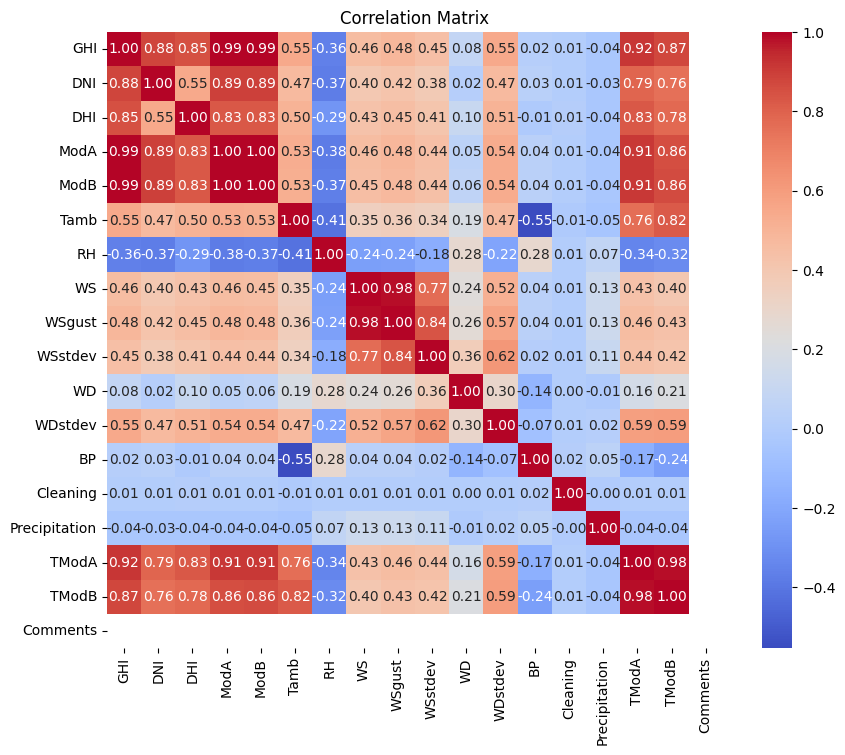

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

CALCULATE Z SCORE

In [83]:

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for missing values, outliers, and incorrect entries
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

print("\nChecking for missing values, outliers, and incorrect entries in specified columns:")

for col in columns_to_check:
    if col in ds.columns:
        print(f"\n--- Checking column: {col} ---")

        # Check for missing values
        missing_count = ds[col].isna().sum()
        print(f"Missing values: {missing_count}")

        if ds[col].dtype in ['int64', 'float64']:
            negative_count = (ds[col] < 0).sum()
            if negative_count > 0:
                print(f"Potential incorrect entries (negative values): {negative_count}")

            if ds[col].nunique() > 1: # Only perform outlier detection if there's more than one unique value
                outliers_iqr = detect_outliers_iqr(ds, col)
                print(f"Outliers detected using IQR: {len(outliers_iqr)}")
                if len(outliers_iqr) > 0:
                    print("Examples of detected outliers (IQR):")
                    print(outliers_iqr[col].head())

        else:
            print(f"Skipping outlier/incorrect entry check for {col} as it's not a numeric type.")
    else:
        print(f"\nColumn '{col}' not found in the dataset.")


Checking for missing values, outliers, and incorrect entries in specified columns:

--- Checking column: GHI ---
Missing values: 0
Potential incorrect entries (negative values): 258847
Outliers detected using IQR: 145
Examples of detected outliers (IQR):
671    1274.0
674    1349.0
676    1334.0
849    1253.0
850    1324.0
Name: GHI, dtype: float64

--- Checking column: DNI ---
Missing values: 0
Potential incorrect entries (negative values): 275987
Outliers detected using IQR: 15196
Examples of detected outliers (IQR):
850    813.0
868    791.9
869    791.8
870    802.0
871    792.5
Name: DNI, dtype: float64

--- Checking column: DHI ---
Missing values: 0
Potential incorrect entries (negative values): 259182
Outliers detected using IQR: 8733
Examples of detected outliers (IQR):
668    554.9
669    583.3
670    610.6
671    615.2
672    612.8
Name: DHI, dtype: float64

--- Checking column: ModA ---
Missing values: 0
Outliers detected using IQR: 98
Examples of detected outliers (IQR):
6

Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag

In [84]:
# Drop rows with missing values in the specified columns
ds_cleaned = ds.dropna(subset=columns_to_check).copy()

print("\nDataset after dropping rows with missing values in key columns:")
overview(ds_cleaned)

# Compute Z-scores for the specified columns
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in zscore_cols:
  if col in ds_cleaned.columns and ds_cleaned[col].nunique() > 1: # Ensure column exists and has variance
    # Handle potential division by zero if standard deviation is 0
    std_dev = ds_cleaned[col].std()
    if std_dev == 0:
        ds_cleaned[f'{col}_ZScore'] = 0 # Assign Z-score of 0 if no variance
    else:
        ds_cleaned[f'{col}_ZScore'] = stats.zscore(ds_cleaned[col])
  else:
    print(f"Skipping Z-score calculation for {col} as it's not in the dataset or has no variance.")


# Flag rows with |Z| > 3 in any of the computed Z-score columns
zscore_columns = [f'{col}_ZScore' for col in zscore_cols if f'{col}_ZScore' in ds_cleaned.columns]

if zscore_columns:
    ds_cleaned['Outlier_Flag'] = (ds_cleaned[zscore_columns].abs() > 3).any(axis=1)
else:
    ds_cleaned['Outlier_Flag'] = False # No Z-score columns to flag

print("\nDataset with Z-scores and Outlier Flag:")
print(ds_cleaned[['GHI', 'GHI_ZScore', 'DNI', 'DNI_ZScore', 'DHI', 'DHI_ZScore', 'ModA', 'ModA_ZScore', 'ModB', 'ModB_ZScore', 'WS', 'WS_ZScore', 'WSgust', 'WSgust_ZScore', 'Outlier_Flag']].head())

print("\nRows flagged as potential outliers (based on |Z| > 3):")
print(ds_cleaned[ds_cleaned['Outlier_Flag']].head())


Dataset after dropping rows with missing values in key columns:
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  fl

In [85]:
import os

# Create the directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'benin_clean.csv')

# Export the cleaned DataFrame to CSV
ds_cleaned.to_csv(output_file, index=False)

print(f"\nCleaned DataFrame exported to {output_file}")


Cleaned DataFrame exported to data/benin_clean.csv


Time Series Analysis

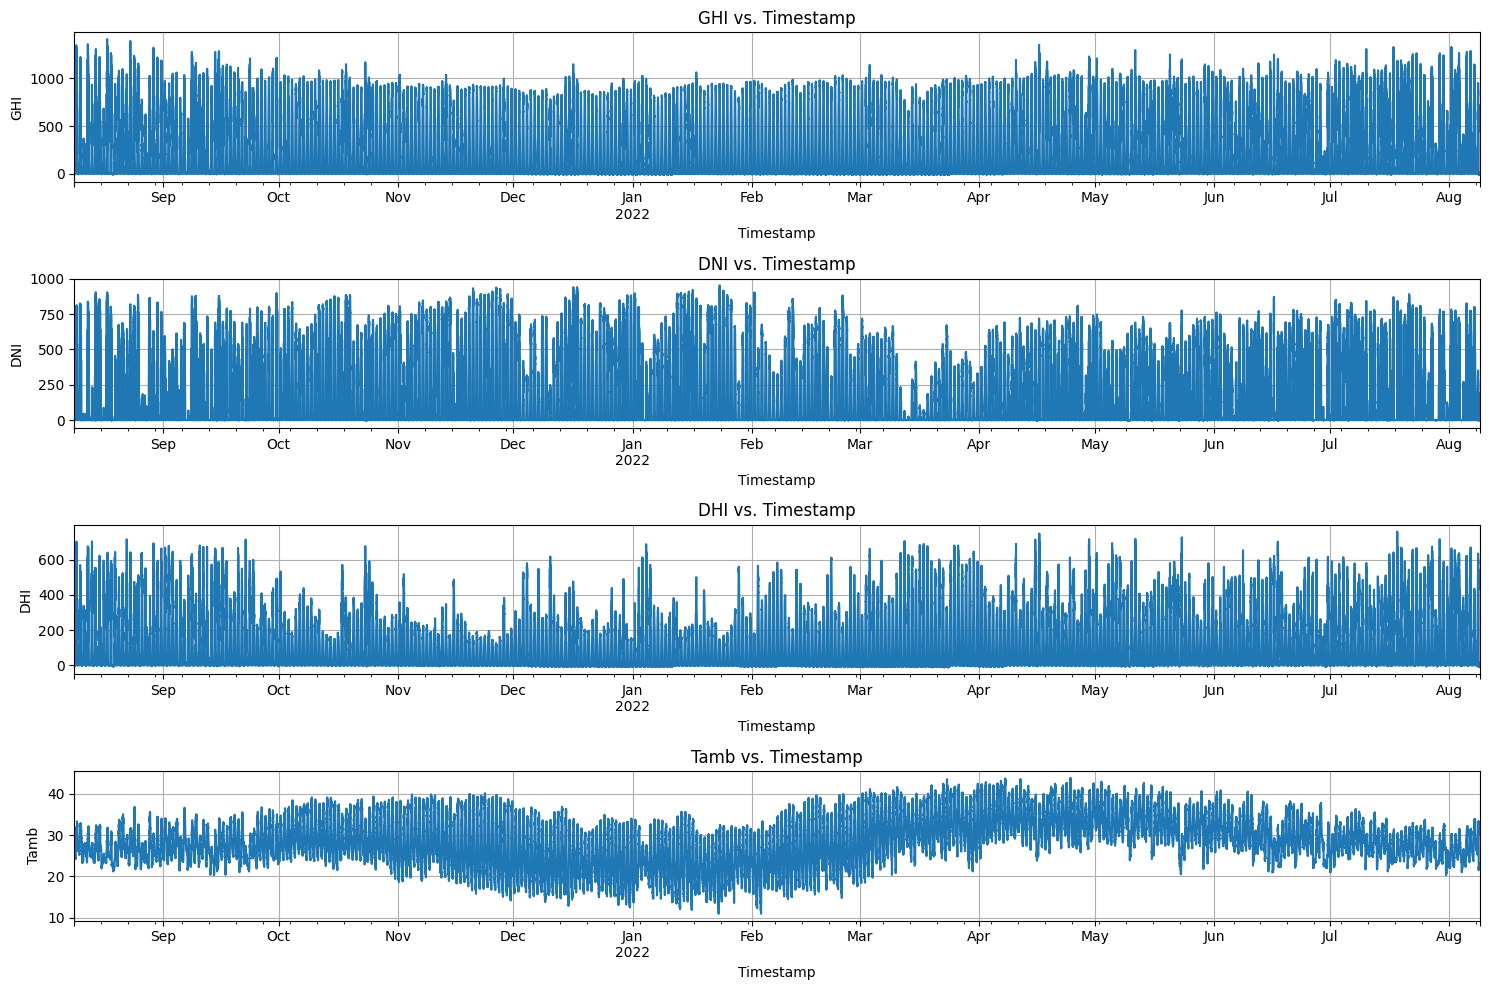

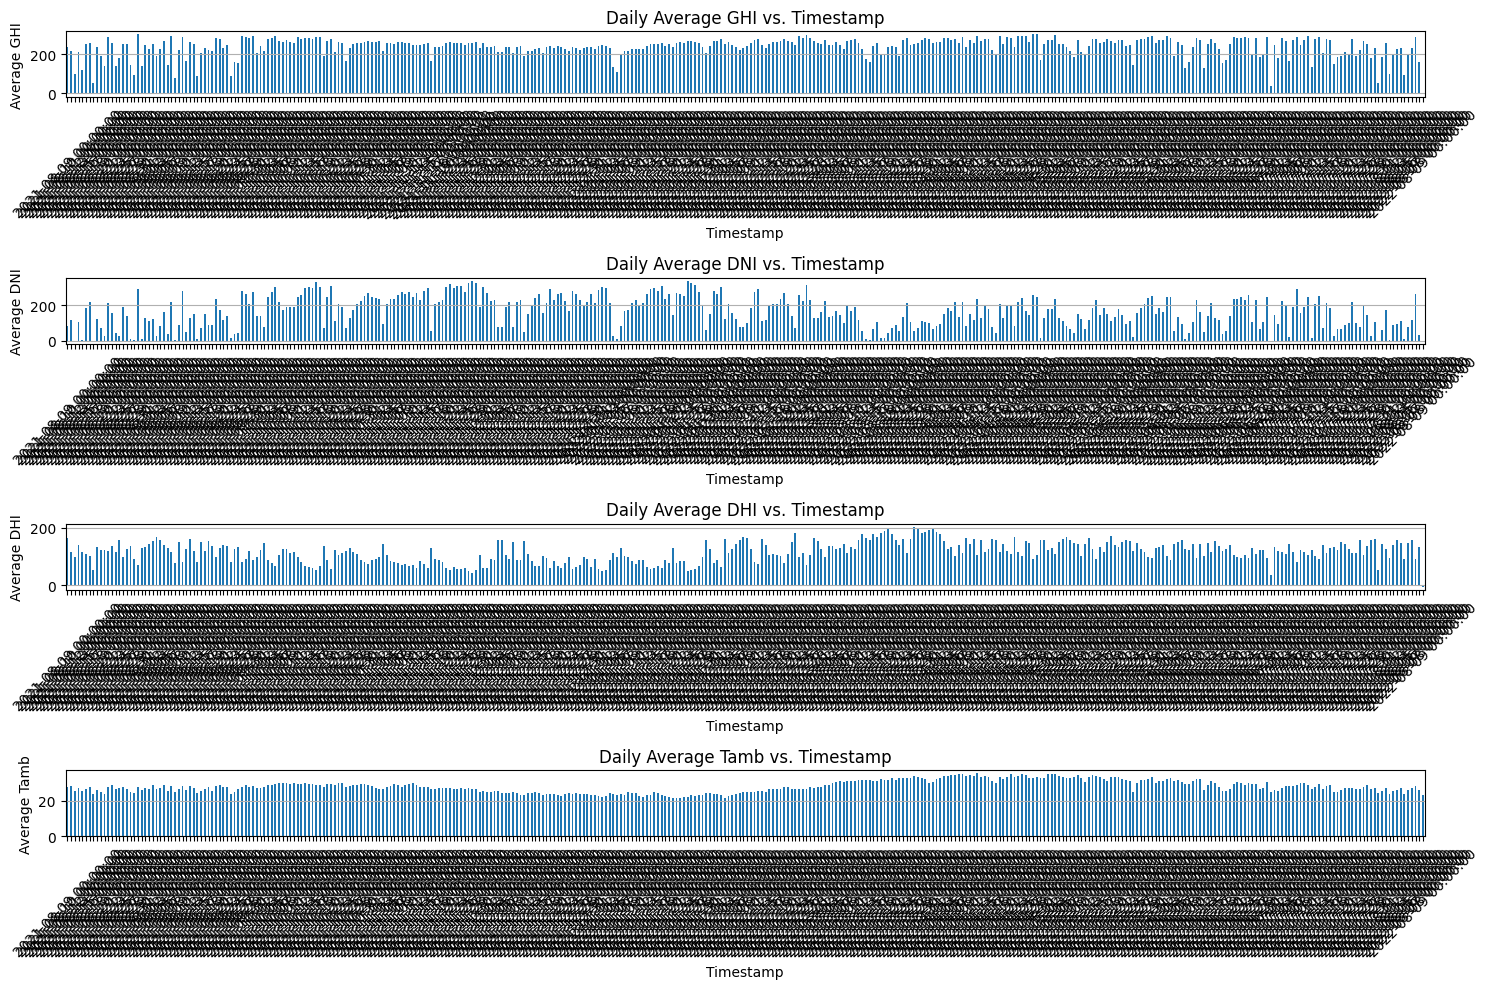

In [101]:


# Define the columns to plot
time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create line plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_time_indexed[col].plot(kind='line')
    plt.title(f'{col} vs. Timestamp')
    plt.ylabel(col)
    plt.xlabel('Timestamp')
    plt.grid(True)

plt.tight_layout()
plt.show()

# For demonstration, let's resample to daily averages for a clearer bar chart view
ds_daily = ds_time_indexed[time_series_cols].resample('D').mean()

plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_daily[col].plot(kind='bar')
    plt.title(f'Daily Average {col} vs. Timestamp')
    plt.ylabel(f'Average {col}')
    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [100]:
ds.shape

(525600, 19)

**Cleaning Impact**


Average ModA and ModB pre/post cleaning:
  Cleaning_Flag        ModA        ModB
0    Post-Clean  517.343618  486.943256
1     Pre-Clean  232.393310  225.026584


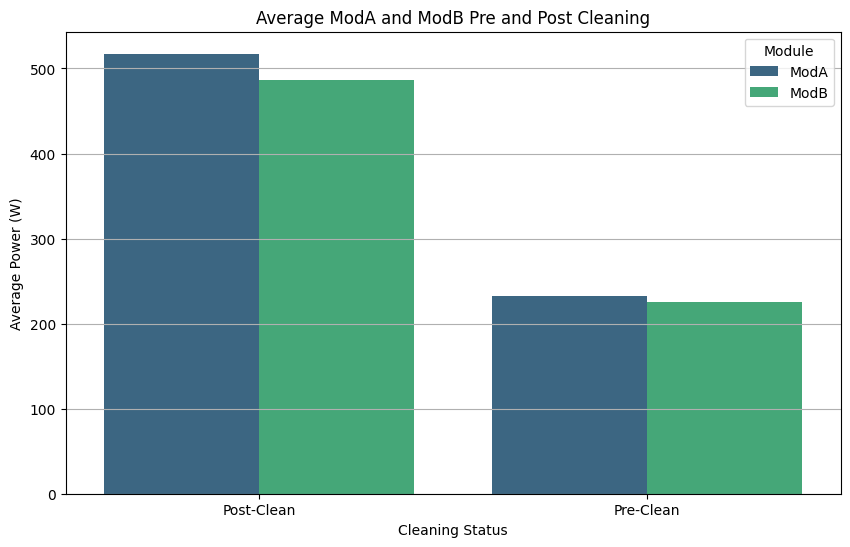

In [102]:

ds_cleaned['Cleaning_Flag'] = ds_cleaned['Outlier_Flag'].apply(lambda x: 'Post-Clean' if x else 'Pre-Clean')

# Group by Cleaning_Flag and calculate the mean of ModA and ModB
mod_comparison = ds_cleaned.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

print("\nAverage ModA and ModB pre/post cleaning:")
print(mod_comparison)

# Melt the DataFrame for plotting
mod_comparison_melted = mod_comparison.melt(id_vars='Cleaning_Flag', var_name='Module', value_name='Average Power')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mod_comparison_melted, x='Cleaning_Flag', y='Average Power', hue='Module', palette='viridis')
plt.title('Average ModA and ModB Pre and Post Cleaning')
plt.ylabel('Average Power (W)')
plt.xlabel('Cleaning Status')
plt.grid(axis='y')
plt.show()

**Correlation & Relationship Analysis**

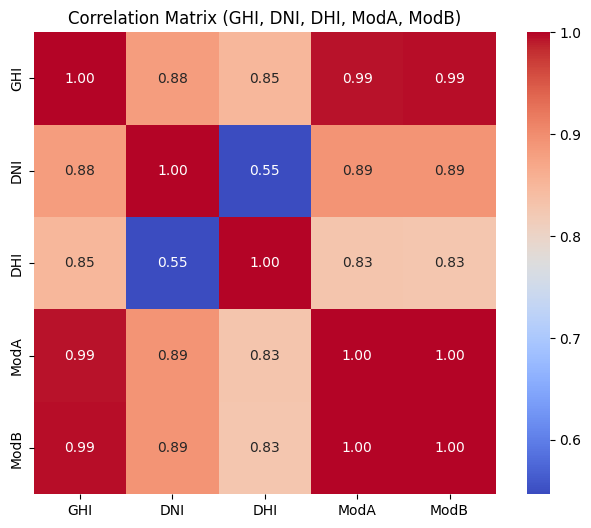

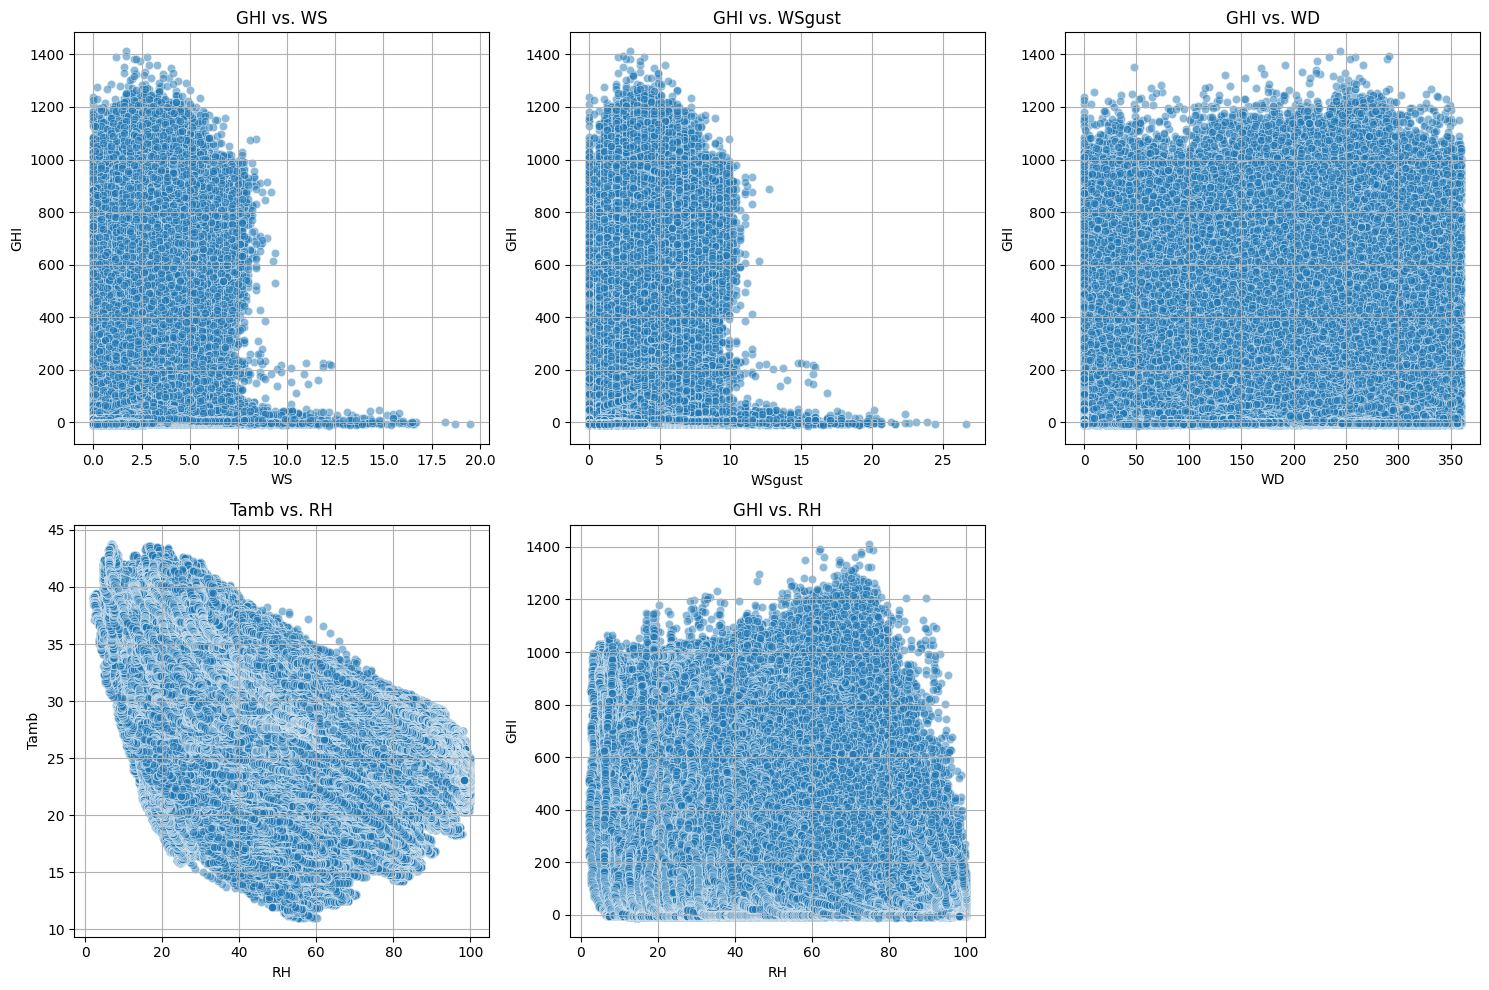

In [103]:

# Heatmap of correlations
correlation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
plt.figure(figsize=(8, 6))
sns.heatmap(ds_cleaned[correlation_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (GHI, DNI, DHI, ModA, ModB)")
plt.show()

# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

plt.figure(figsize=(15, 10))

for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in ds_cleaned.columns and y_col in ds_cleaned.columns:
        plt.subplot(2, 3, i + 1) # Arrange in 2 rows, 3 columns
        sns.scatterplot(data=ds_cleaned, x=x_col, y=y_col, alpha=0.5)
        plt.title(f'{y_col} vs. {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
    else:
        print(f"Skipping scatter plot for {x_col} vs. {y_col} as one or both columns are not in the dataset.")

plt.tight_layout()
plt.show()

**Wind & Distribution Analysis**

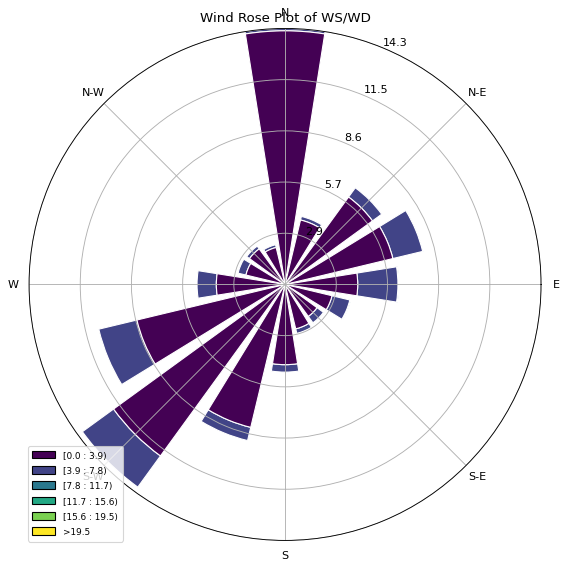

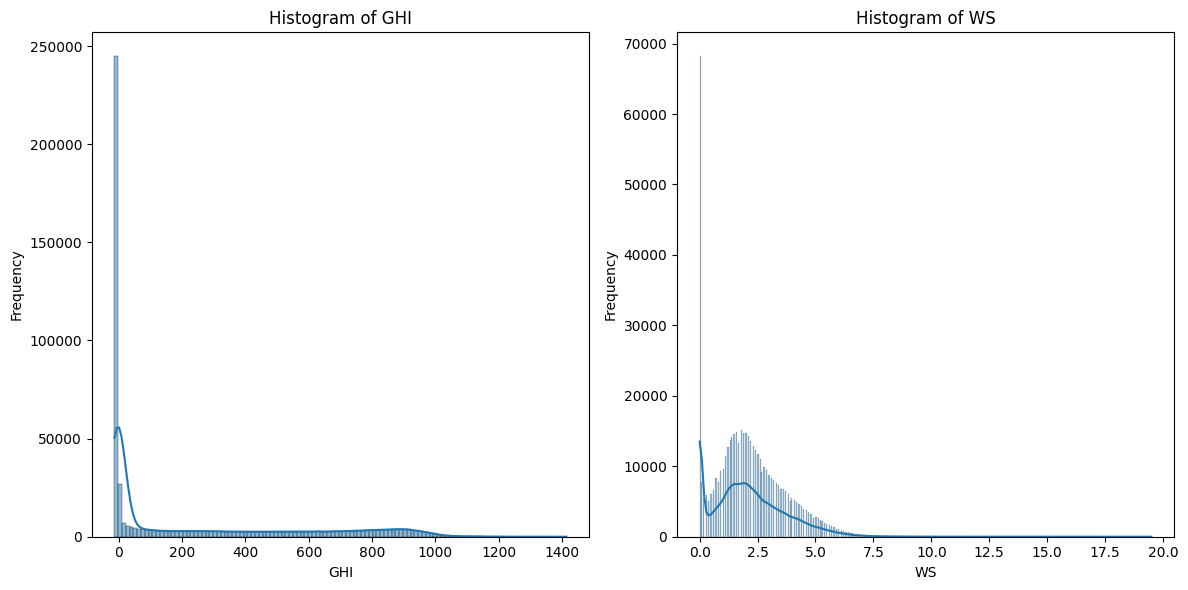

In [104]:

# Check if 'WD' and 'WS' columns exist
if 'WD' in ds_cleaned.columns and 'WS' in ds_cleaned.columns:
  # Requires windrose library: !pip install windrose
  !pip install windrose
  from windrose import WindroseAxes

  # Create a WindroseAxes instance
  ax = WindroseAxes.from_ax()
  # Plot the wind rose
  ax.bar(ds_cleaned['WD'], ds_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
  # Set the title
  ax.set_title('Wind Rose Plot of WS/WD')
  # Add legend
  ax.set_legend()
  plt.show()
else:
  print("Skipping Wind Rose plot as 'WD' or 'WS' column is not in the dataset.")


# Histograms for GHI and WS
plt.figure(figsize=(12, 6))

# Histogram for GHI
if 'GHI' in ds_cleaned.columns:
  plt.subplot(1, 2, 1)
  sns.histplot(ds_cleaned['GHI'], kde=True)
  plt.title('Histogram of GHI')
  plt.xlabel('GHI')
  plt.ylabel('Frequency')
else:
  print("Skipping GHI histogram as 'GHI' column is not in the dataset.")

# Histogram for WS
if 'WS' in ds_cleaned.columns:
  plt.subplot(1, 2, 2)
  sns.histplot(ds_cleaned['WS'], kde=True)
  plt.title('Histogram of WS')
  plt.xlabel('WS')
  plt.ylabel('Frequency')
else:
  print("Skipping WS histogram as 'WS' column is not in the dataset.")

plt.tight_layout()
plt.show()


**Temperature Analysis**

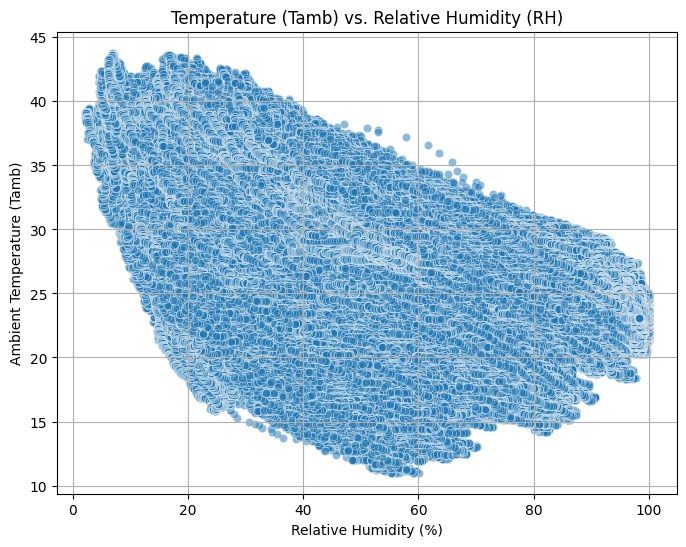

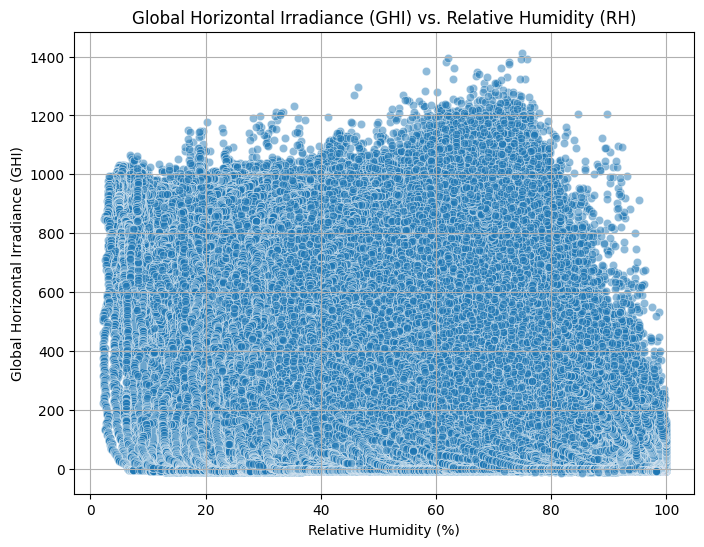

In [105]:
# Scatter plot for Tamb vs. RH
if 'Tamb' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='Tamb', alpha=0.5)
  plt.title('Temperature (Tamb) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Ambient Temperature (Tamb)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping Temperature vs. RH scatter plot as 'Tamb' or 'RH' column is not in the dataset.")

# Scatter plot for GHI vs. RH
if 'GHI' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='GHI', alpha=0.5)
  plt.title('Global Horizontal Irradiance (GHI) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Global Horizontal Irradiance (GHI)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping GHI vs. RH scatter plot as 'GHI' or 'RH' column is not in the dataset.")

***Bubble Chart***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


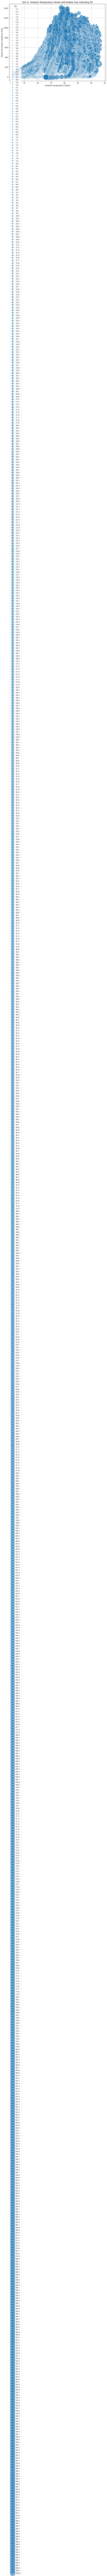

In [106]:
# prompt: GHI vs. Tamb with bubble size = RH or BP.

# Scatter plot with bubble size based on RH or BP
# Let's use RH as the size variable

# Check if required columns exist
if 'GHI' in ds_cleaned.columns and 'Tamb' in ds_cleaned.columns and ('RH' in ds_cleaned.columns or 'BP' in ds_cleaned.columns):

    size_col = 'RH' if 'RH' in ds_cleaned.columns else ('BP' if 'BP' in ds_cleaned.columns else None)

    if size_col:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=ds_cleaned, x='Tamb', y='GHI', size=size_col, alpha=0.6, sizes=(20, 1000), legend='full')
        plt.title(f'GHI vs. Ambient Temperature (Tamb) with Bubble Size indicating {size_col}')
        plt.xlabel('Ambient Temperature (Tamb)')
        plt.ylabel('Global Horizontal Irradiance (GHI)')
        plt.grid(True)
        plt.show()
    else:
        print("Skipping bubble plot as neither 'RH' nor 'BP' column is available for bubble size.")

else:
    print("Skipping bubble plot as required columns ('GHI', 'Tamb', and either 'RH' or 'BP') are not in the dataset.")

Visualize columns

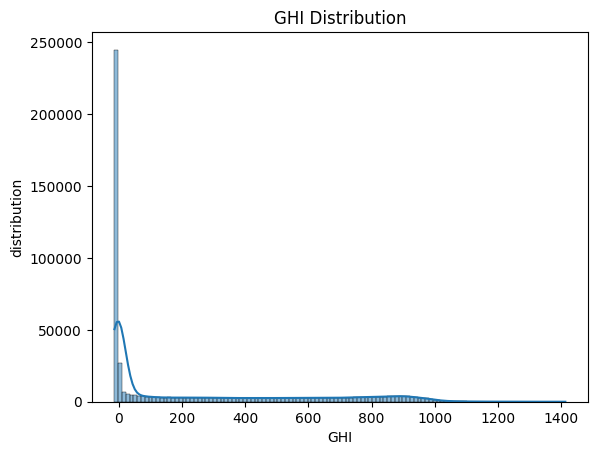

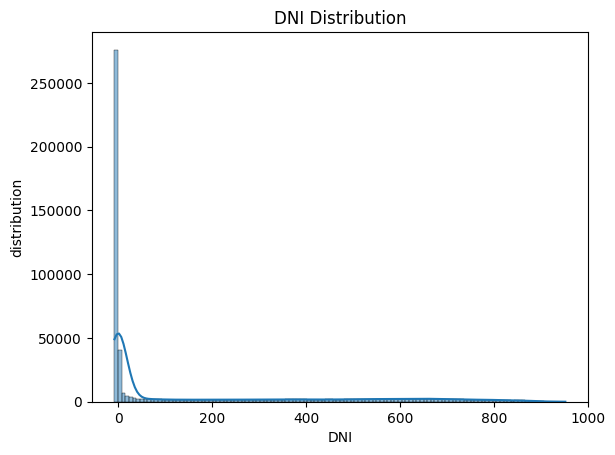

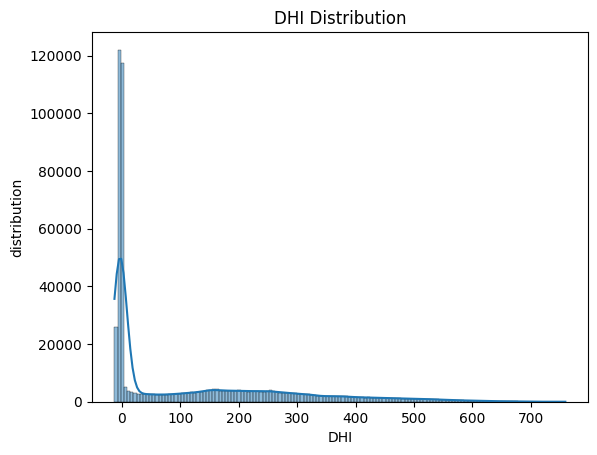

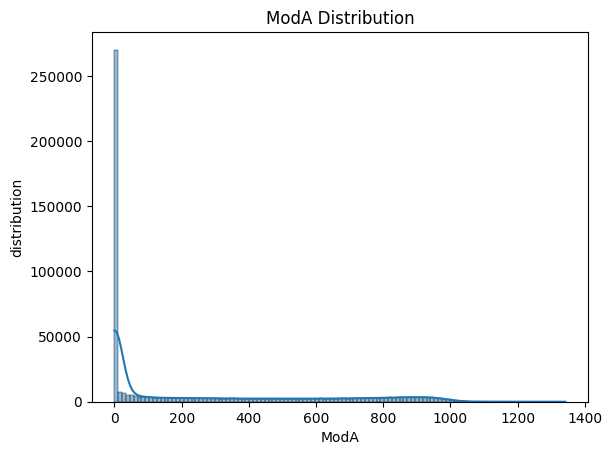

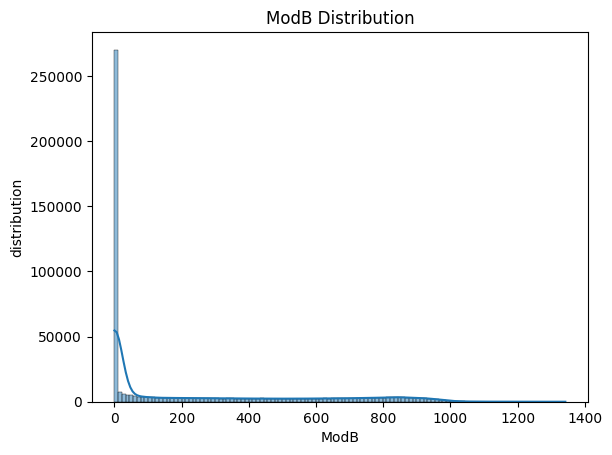

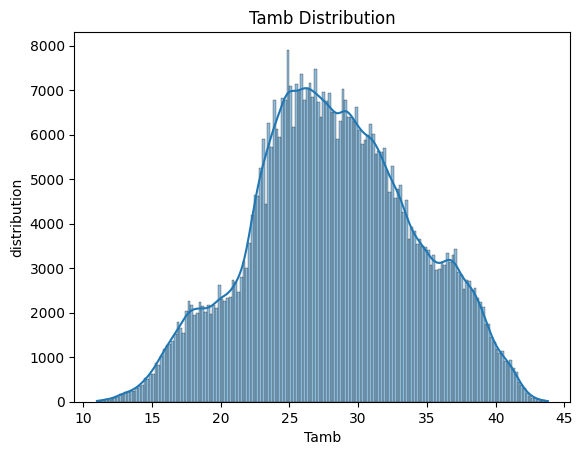

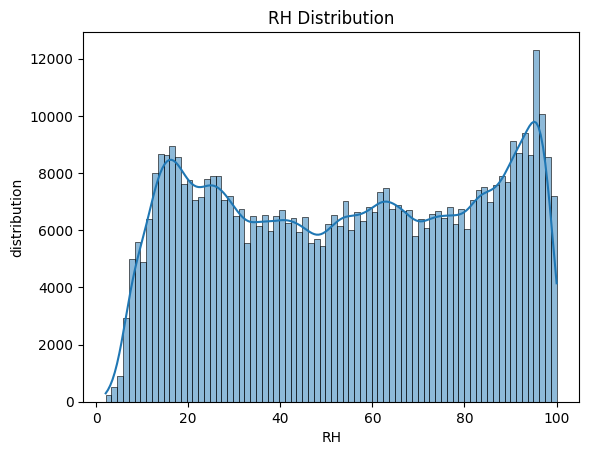

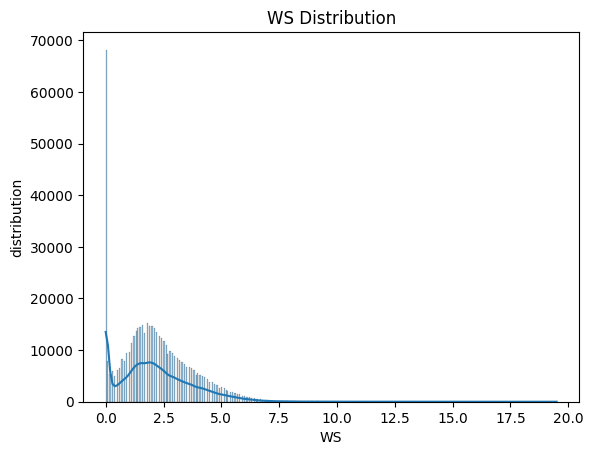

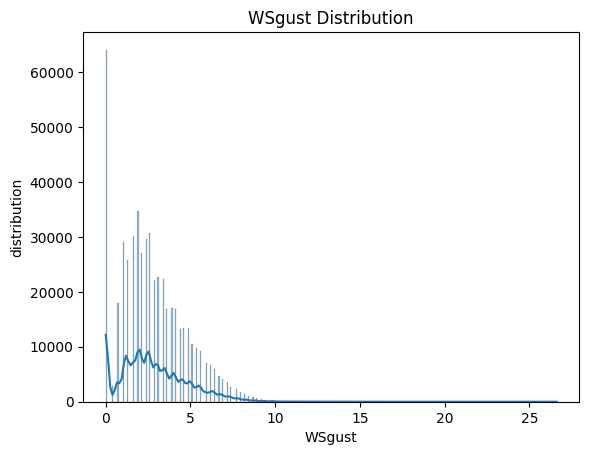

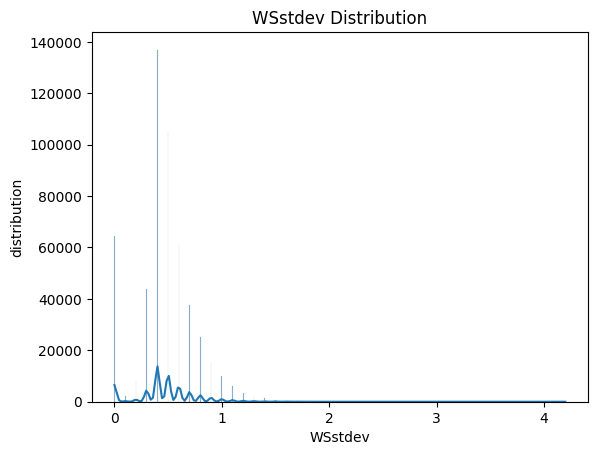

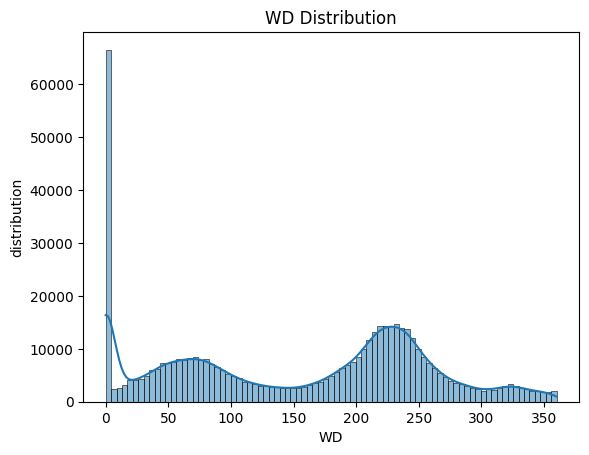

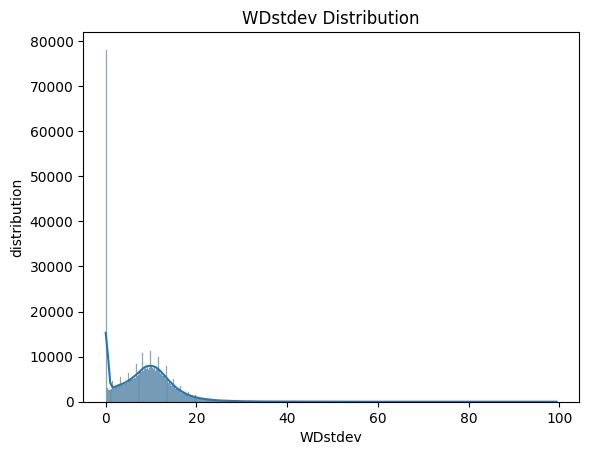

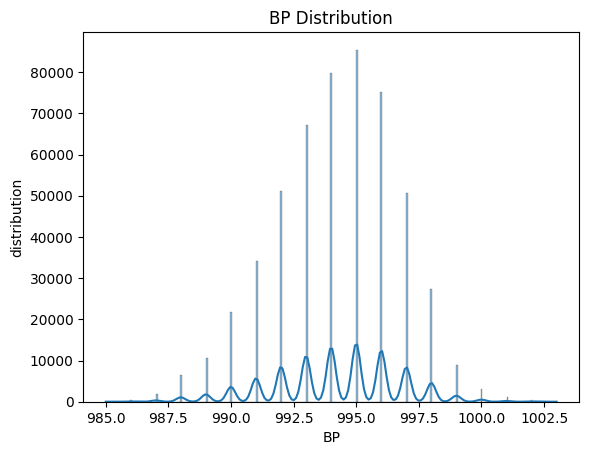

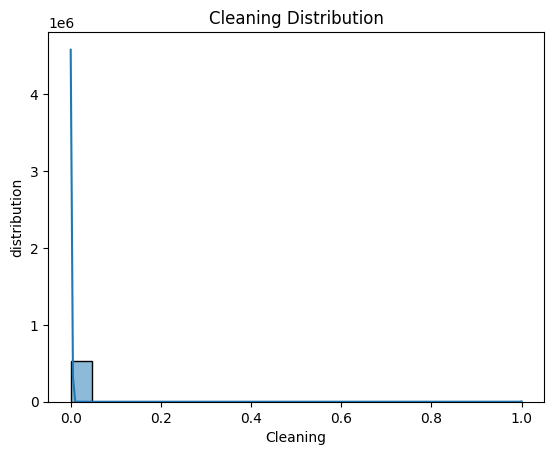

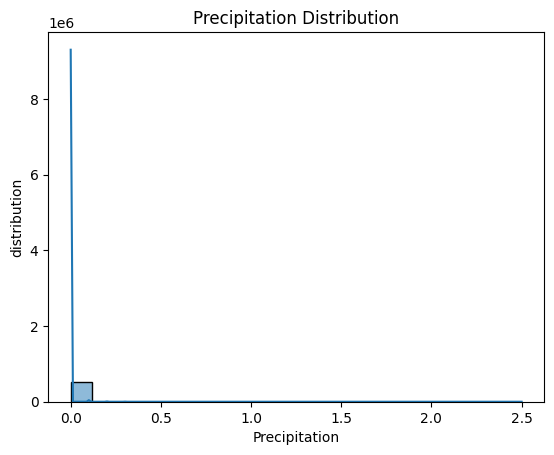

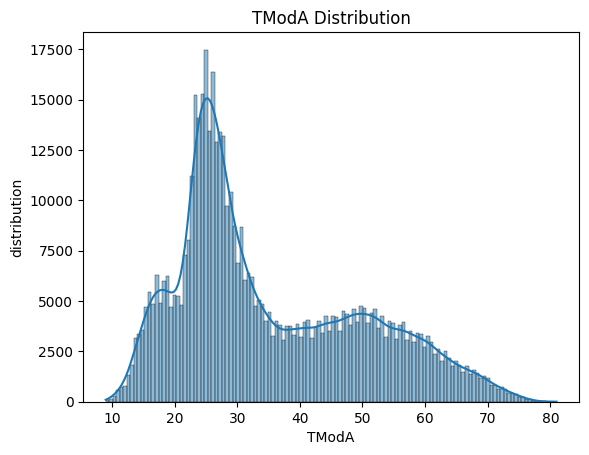

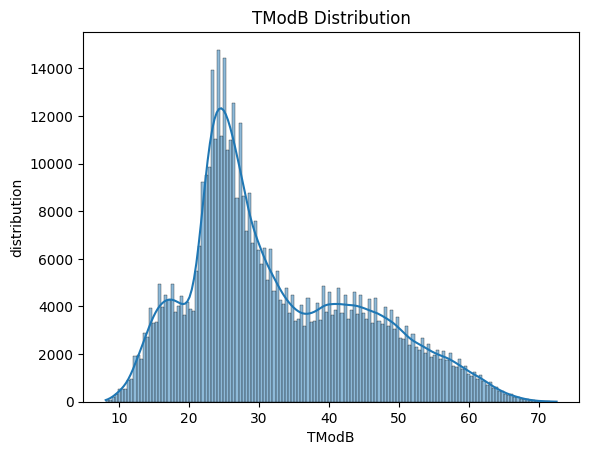

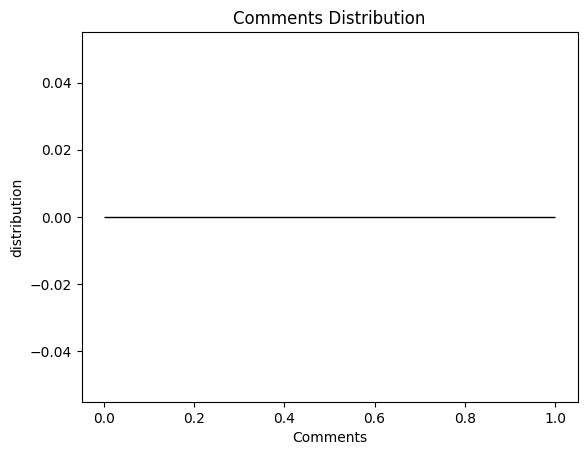

In [47]:
for col in numeric_df:
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

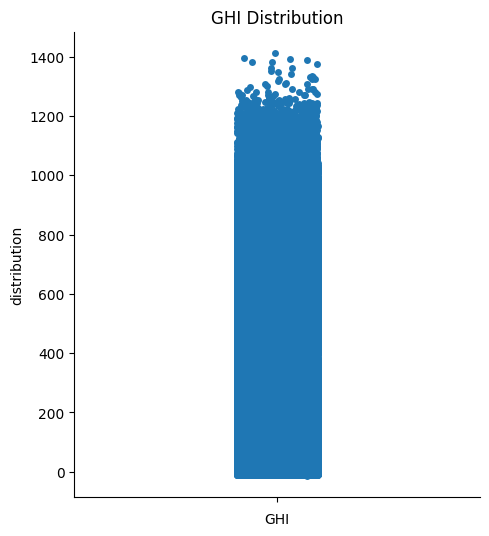

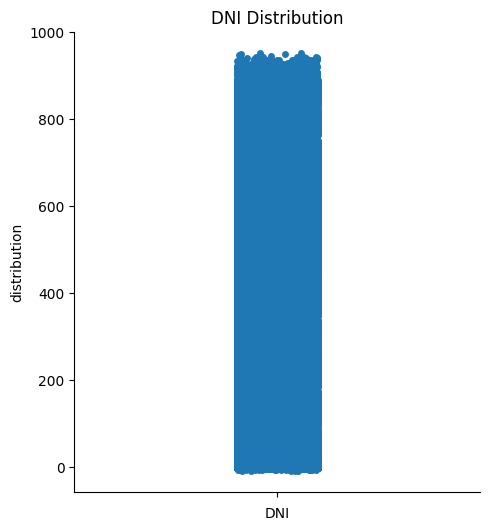

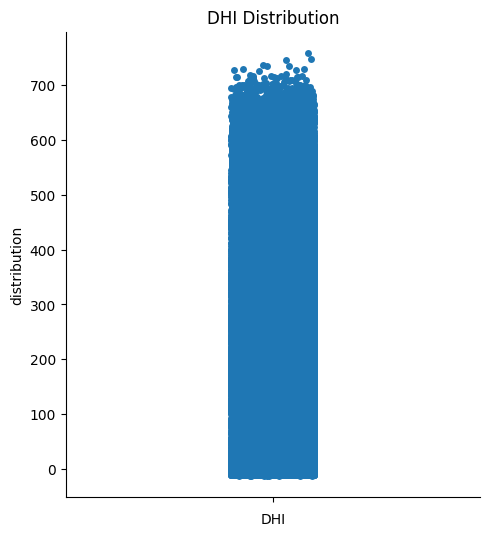

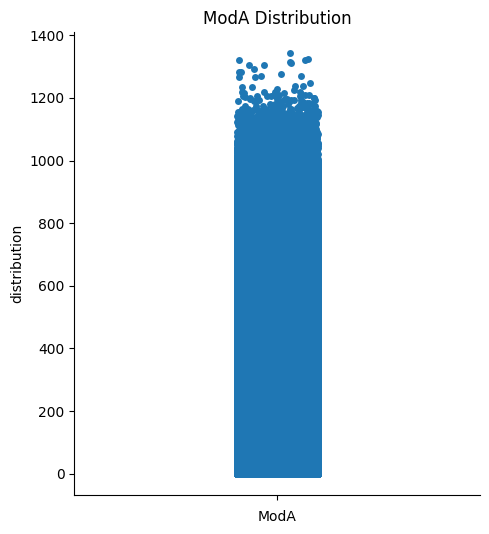

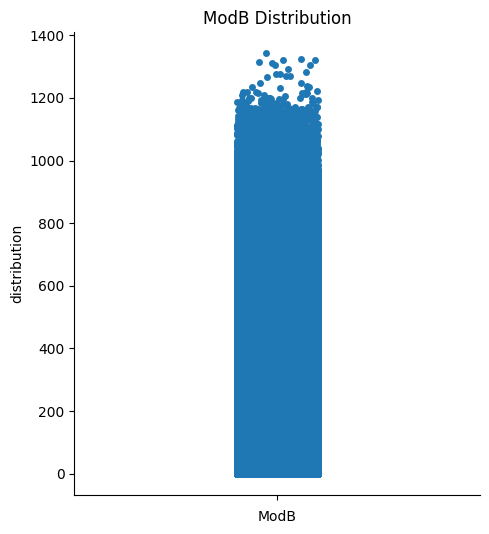

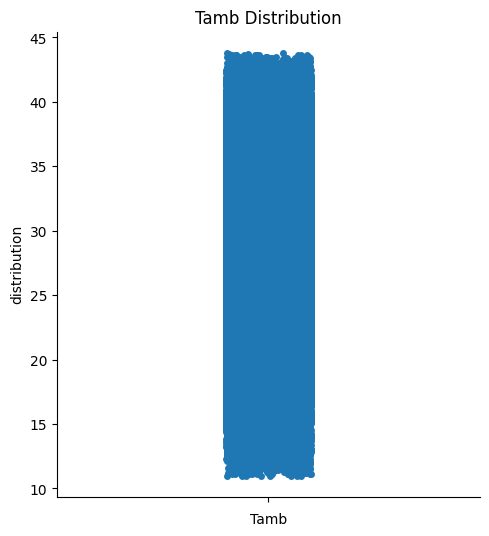

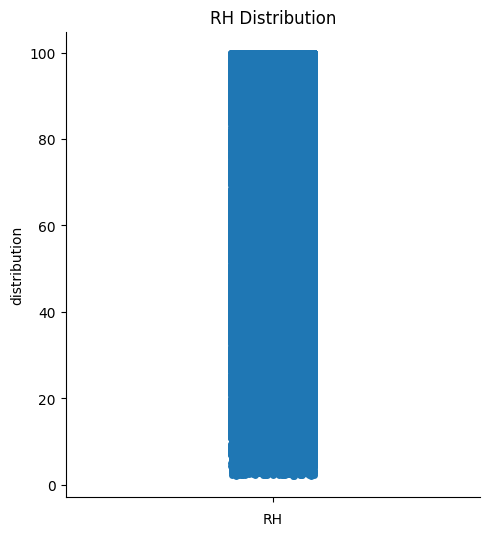

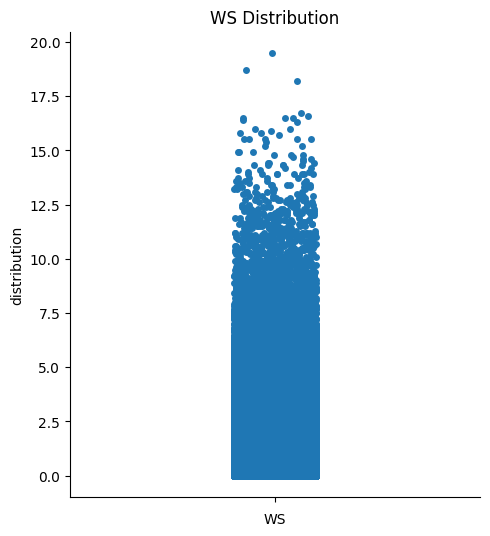

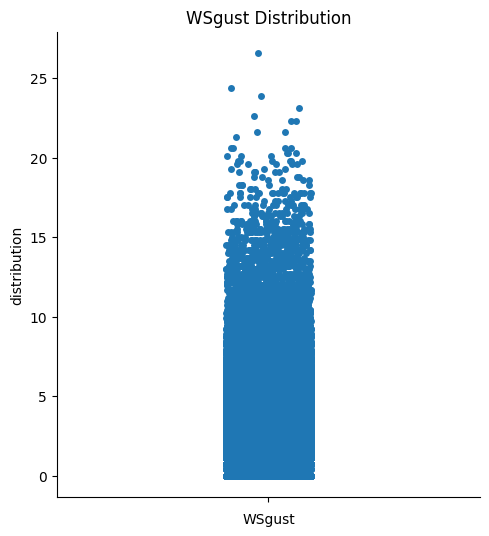

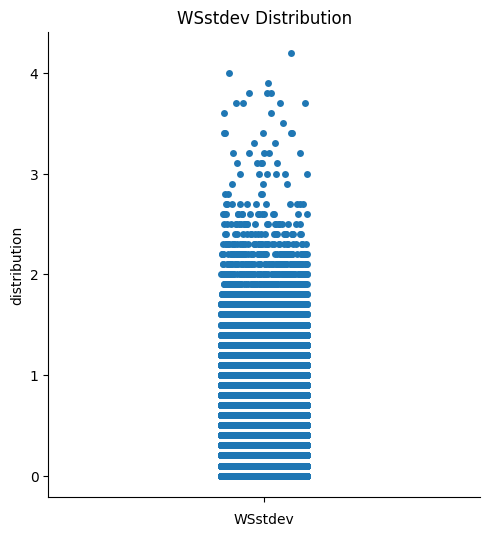

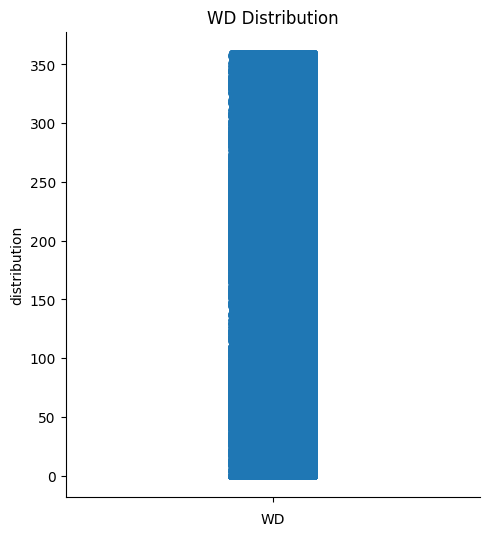

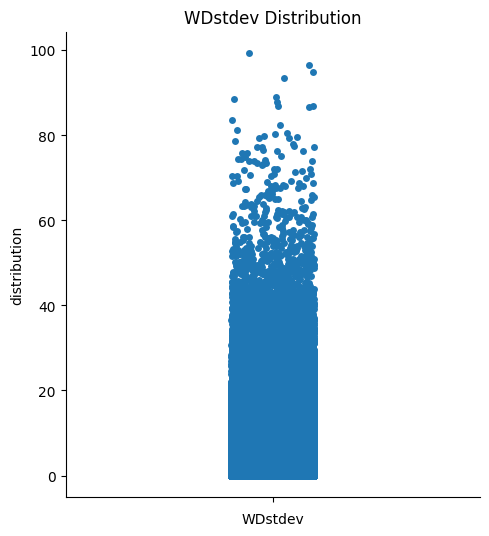

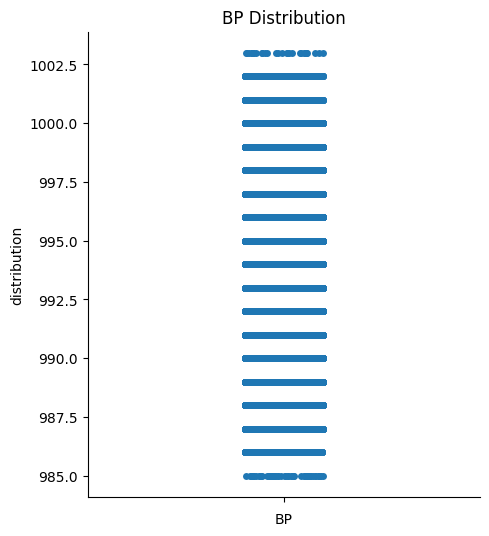

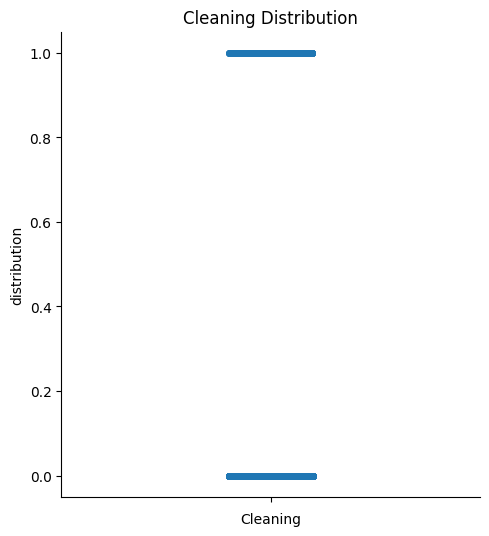

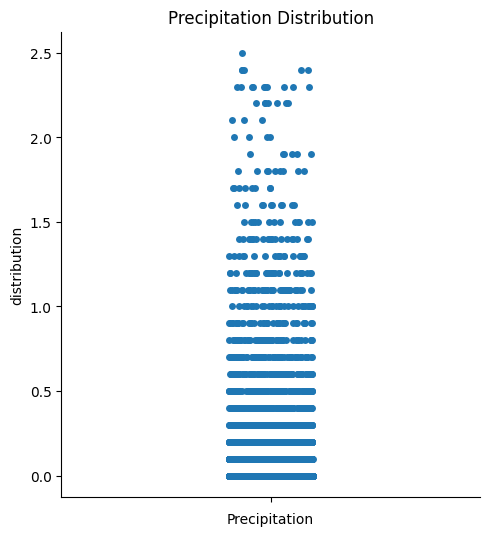

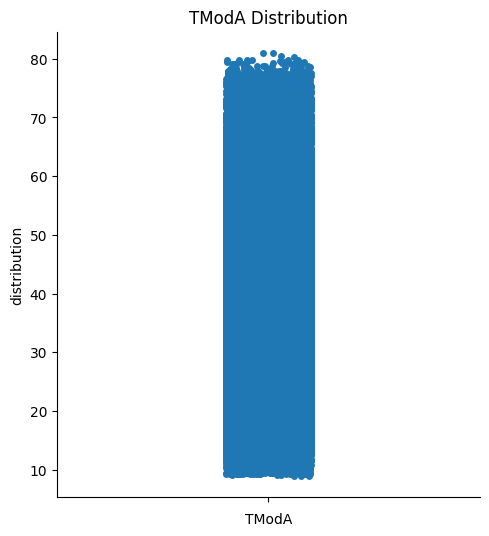

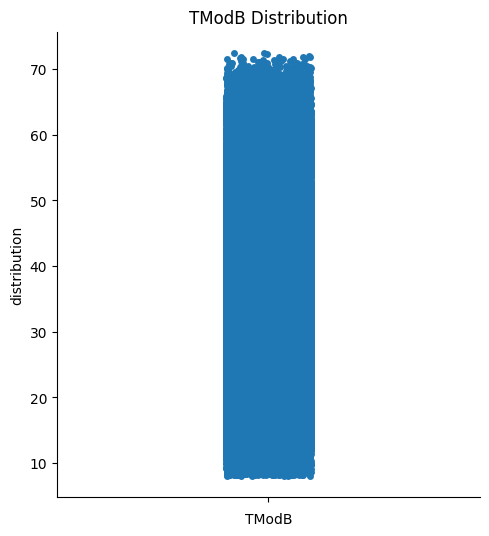

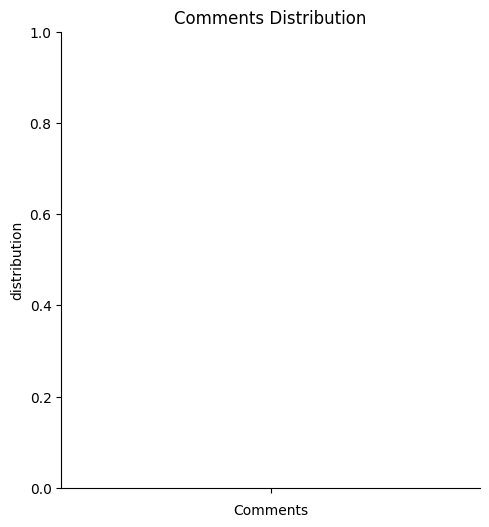

In [52]:
for col in numeric_df:
    sns.catplot(numeric_df[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


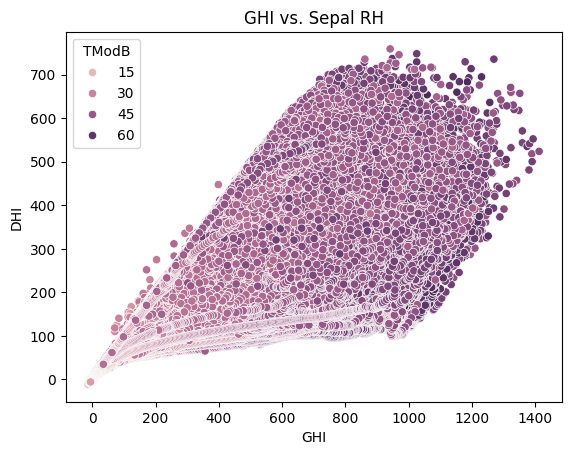

In [60]:
print(ds.columns)
sns.scatterplot(data=ds, x="GHI", y="DHI", hue="TModB")
plt.title("GHI vs. Sepal RH")
plt.show()
